## Importing all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Load dataset

In [ ]:

data_path = "./dataset/tip.csv"
df = pd.read_csv(data_path)

# Preview the data
print("Shape:", df.shape)
print(df.info())
df.head()


Shape: (244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Preproccessing

### Cleaning data

In [5]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop duplicates just in case
df = df.drop_duplicates().reset_index(drop=True)

# Confirm clean
print("After cleaning:", df.shape)


Missing values per column:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
After cleaning: (243, 7)


### Exploratory Data Analysis (EDA)

        total_bill         tip   sex smoker  day    time        size
count   243.000000  243.000000   243    243  243     243  243.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.813868    3.002387   NaN    NaN  NaN     NaN    2.572016
std       8.910071    1.385002   NaN    NaN  NaN     NaN    0.952356
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.380000    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.810000    2.920000   NaN    NaN  NaN     NaN    2.000000
75%      24.175000    3.575000   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000


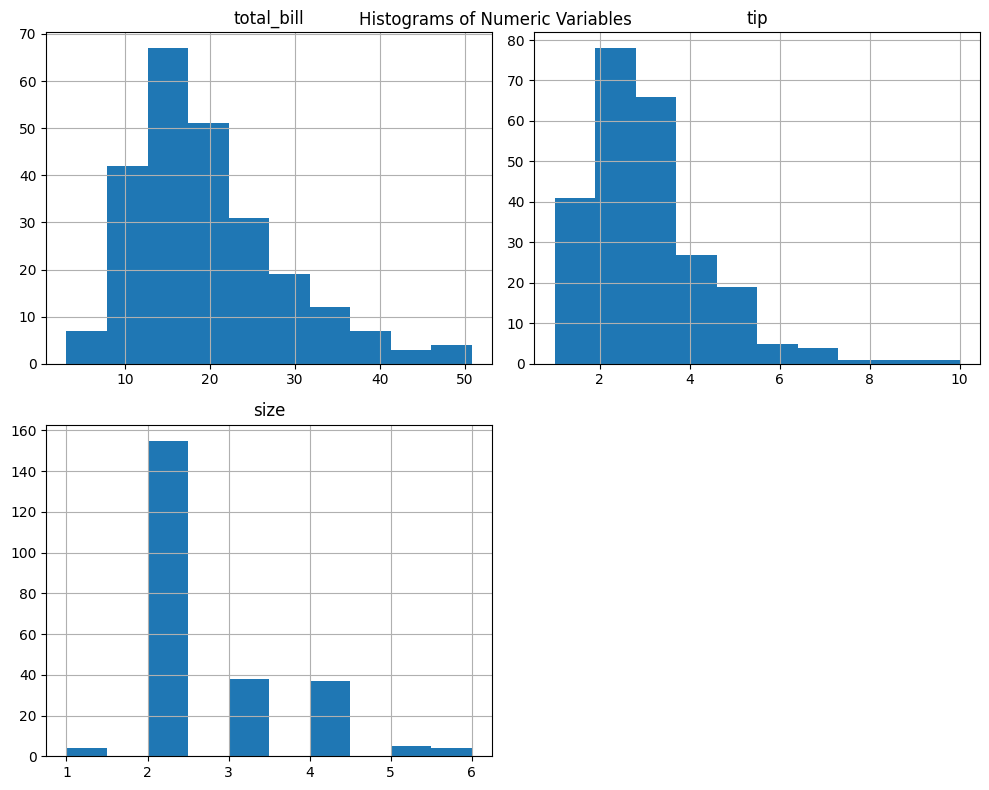

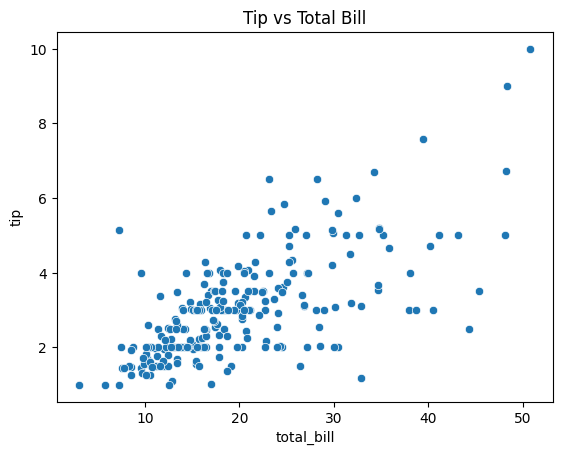

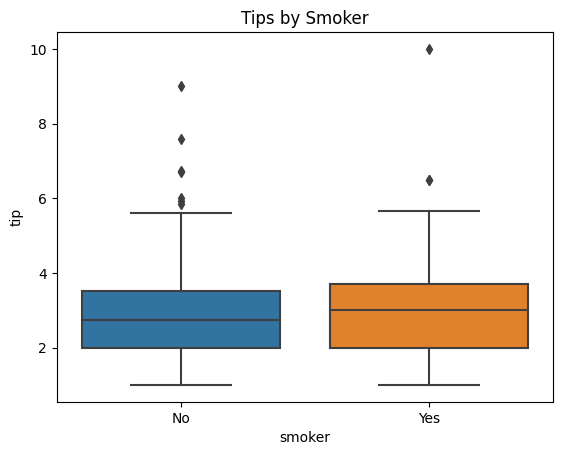

ModuleNotFoundError: No module named 'statsmodels'

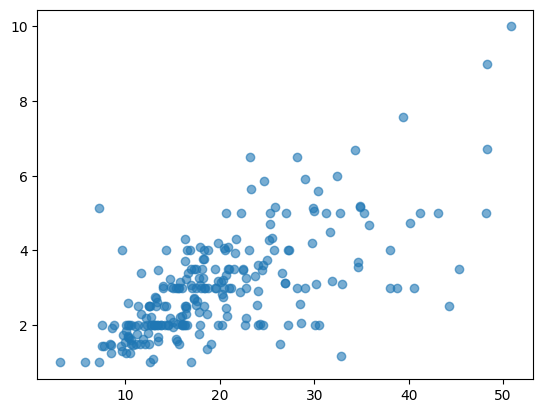

In [ ]:
# Summary statistics 
print(df.describe(include="all"))

# ==== Histograms ====
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# ==== Scatter: tip vs total_bill ====
sns.scatterplot(x="total_bill", y="tip", data=df)
plt.title("Tip vs Total Bill")
plt.show()

# ==== Boxplot: tip by smoker ====
sns.boxplot(x="smoker", y="tip", data=df)
plt.title("Tips by Smoker")
plt.show()

# ==== Correlation heatmap (numeric only) ====
df_enc = pd.get_dummies(df, drop_first=True)  # encode cats
corr = df_enc.corr(method="pearson")

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap (with One-Hot Encoded Categoricals)")
plt.tight_layout()
plt.show()

# If you want just correlations with 'tip':
corr_with_tip = corr['tip'].sort_values(ascending=False)
print(corr_with_tip)